线性回归

前提：
* 自变量和因变量之间必须有线性关系。
* 不应该出现任何异常值。
* 没有异方差性。
* 样本应该是独立同分布。
* 误差项应均值为0，方差恒定的服从正态分布。
* 不存在多重共线性和自相关。

sklearn的一元线性回归
用开盘价预测收盘价的线性回归

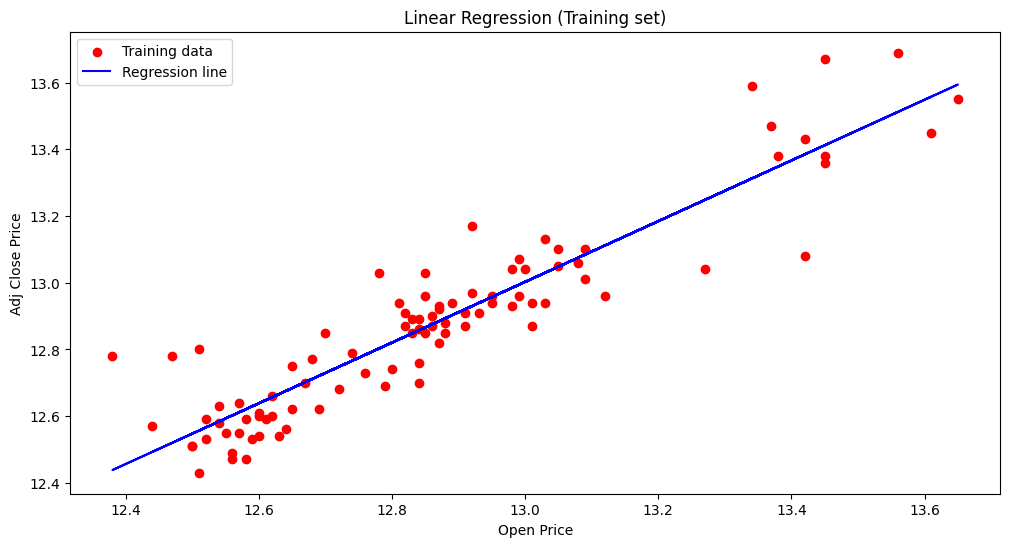

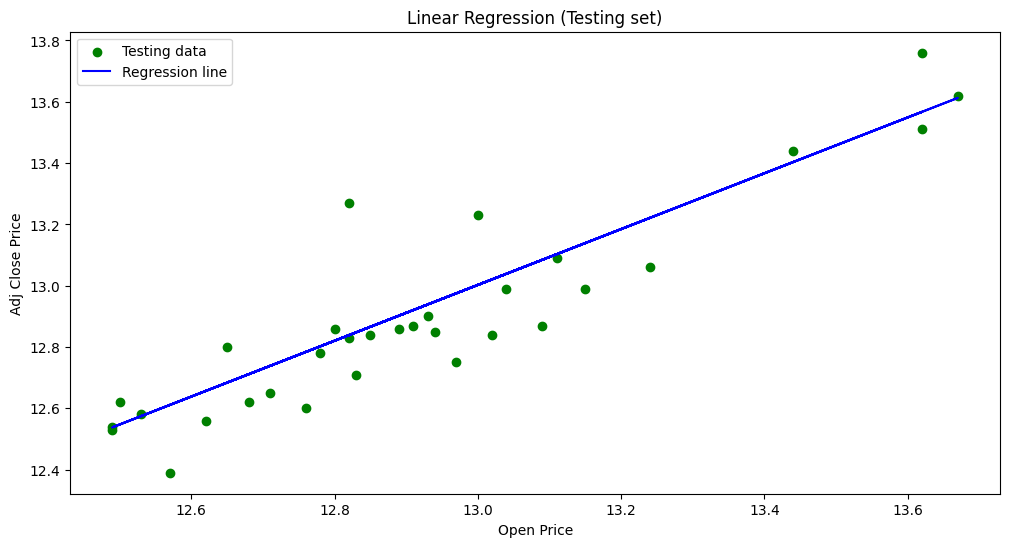

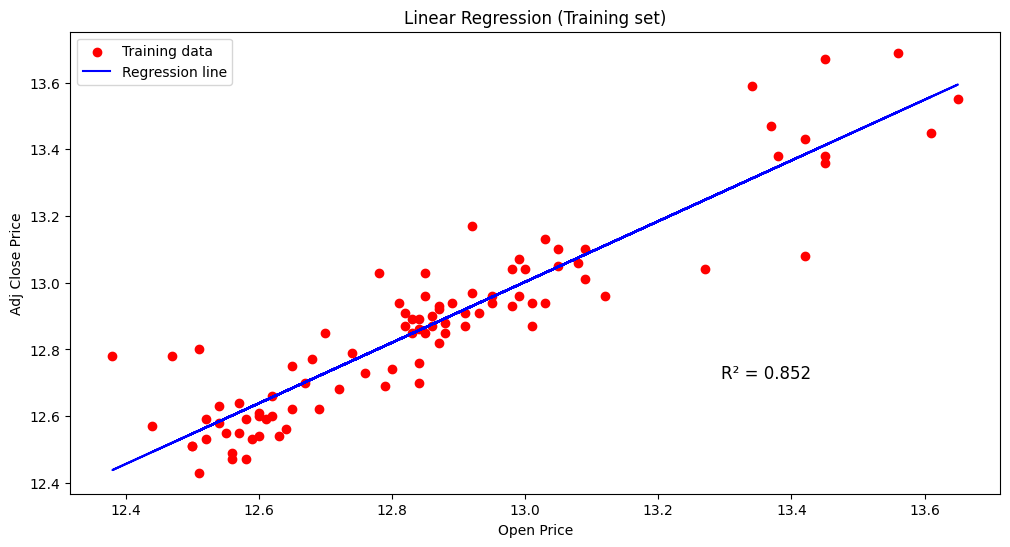

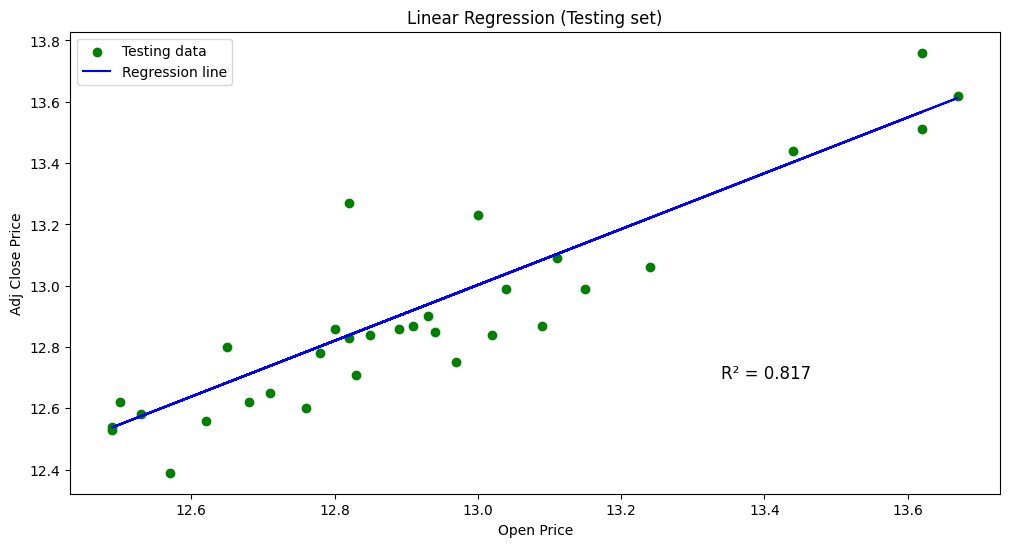

Coefficient: 0.911
Intercept: 1.164
R^2 score on training set: 0.852
R^2 score on testing set: 0.817


In [11]:
import pandas as pd # 处理表格数据CSV
import numpy as np # 科学计算库，处理数组
from sklearn.model_selection import train_test_split # 用来划分数据集
from sklearn.linear_model import LinearRegression, Ridge  # 调用线性回归模型
import matplotlib.pyplot as plt # 画图工具
import os # 用来操作文件路径

# ---------------- 读取数据 ----------------
file_name = "../../dataset/raw/sh600000_2017.csv" # 定义要读取的 CSV 文件路径
df_result = pd.read_csv(file_name) # 把CSV文件加载成为一个DataFrame（类似Excel的表格）

# 确保数据类型正确（ open 和 close 是 float）
# 用astype把股票的 open（开盘价）和 close（收盘价）转为浮点数
# 因为CSV读进来时可能是字符串，要做回归只能是数值型
df_result['open'] = df_result['open'].astype(float)
df_result['close'] = df_result['close'].astype(float)  # 前复权收盘价

# ---------------- 构建训练集和测试集 ----------------
# X：输入特征，这里只取open列数据
# Y：目标变量，这里取close列
# 这里用[[]]就可以返回二维数组，比如open列的数据有100个，那这里返回的就是（100，1），否则是（100，），sklearn里有时候会报错
X = df_result[['open']].values  # 二维数组
Y = df_result[['close']].values

# 拆成75%为训练集，25%为测试集
# random_state=0 保证每次分割方式一致，结果可复现
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

# ---------------- 训练线性回归 ----------------
# 创建一个线性回归的模型对象regressor
# .fit() 用训练集的数据去训练模型，找到最优的直线
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# ---------------- 预测 ----------------
# 训练好后，拿测试集的变量预测收盘价
Y_pred = regressor.predict(X_test)

# ---------------- 可视化 ----------------
# 可视化训练集——红点=真实数据，蓝线=模型拟合结果
plt.figure(figsize=(12,6))
plt.scatter(X_train, Y_train, color='red', label='Training data')   #画训练集的实际点（红点）
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression line')    # 画回归直线
plt.title('Linear Regression (Training set)')
plt.xlabel('Open Price')
plt.ylabel('Adj Close Price')
plt.legend()    # 显示图例
plt.show()  # 画图

# 可视化测试集
plt.figure(figsize=(12,6))
plt.scatter(X_test, Y_test, color='green', label='Testing data')    # 绿色散点=真实测试数据
plt.plot(X_test, Y_pred, color='blue', label='Regression line') # 画预测的结果，蓝色直线
plt.title('Linear Regression (Testing set)')
plt.xlabel('Open Price')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# 加上了显示R2在图上（不是图例，是图上）
R21 = regressor.score(X_train, Y_train)
plt.figure(figsize=(12,6))
plt.scatter(X_train, Y_train, color='red', label='Training data')   #画训练集的实际点（红点）
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression line')    # 画回归直线
plt.title('Linear Regression (Training set)')
plt.text(0.7, 0.25, f"R² = {R21:.3f}", fontsize=12, color='black', transform=plt.gca().transAxes)
plt.xlabel('Open Price')
plt.ylabel('Adj Close Price')
plt.legend()    # 显示图例
plt.show()  # 画图

R22 = regressor.score(X_test, Y_test)
plt.figure(figsize=(12,6))
plt.scatter(X_test, Y_test, color='green', label='Testing data')    # 绿色散点=真实测试数据
plt.plot(X_test, Y_pred, color='blue', label='Regression line') # 画预测的结果，蓝色直线
plt.title('Linear Regression (Testing set)')
plt.text(0.7, 0.25, f"R² = {R22:.3f}", fontsize=12, color='black', transform=plt.gca().transAxes)
plt.xlabel('Open Price')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()
# ---------------- 打印回归结果 ----------------
# 模型的系数（斜率）
print(f"Coefficient: {regressor.coef_[0][0]:.3f}")
# 模型的截距
print(f"Intercept: {regressor.intercept_[0]:.3f}")
# 返回R^2，这是决定系数，用于衡量模型的拟合效果，越接近1就越完美拟合
print(f"R^2 score on training set: {regressor.score(X_train, Y_train):.3f}")
print(f"R^2 score on testing set: {regressor.score(X_test, Y_test):.3f}")



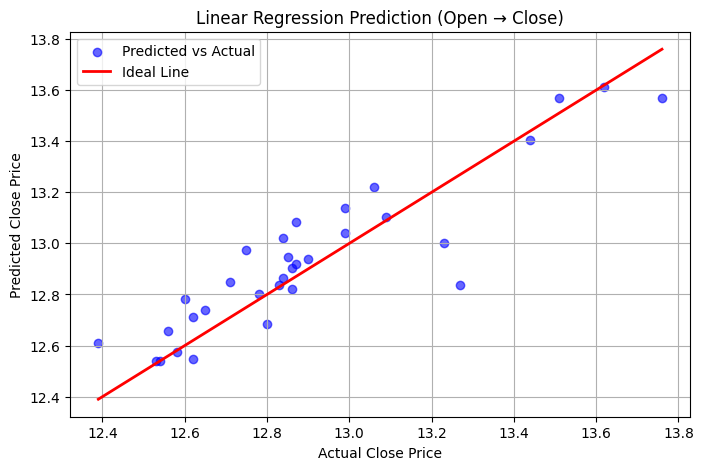

In [3]:
# 蓝色点——模型预测vs真实值
# 红线——理想预测
# 越接近红线——模型预测越准
# 点偏离红线——模型预测差
# 点的分布趋势接近红线——模型有一定拟合能力
# 点随机分布——模型完全没学到规律
# 这张图就是预测表
plt.figure(figsize=(8,5))
# 测试集的真实结果Y_test作为X轴
# 测试集的预测结果Y_pred作为Y轴
# color='blue' → 散点颜色为蓝色
# alpha=0.6 → 散点半透明（0 完全透明，1 完全不透明）
# label="Predicted vs Actual" → 给这一组散点加图例标签
# 这样可以看到模型预测值和真实值的对应关系
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
# x 轴从最小值到最大值
# y 轴从最小值到最大值
# 颜色红色
# 线宽为2
# 这条线表示：预测值完美等于真实值，所有点如果在这条线上，模型就是完美的
# 这条线就是y=x
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', lw=2, label="Ideal Line")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression Prediction (Open → Close)")
plt.legend()
plt.grid(True)
plt.show()

多元线性回归

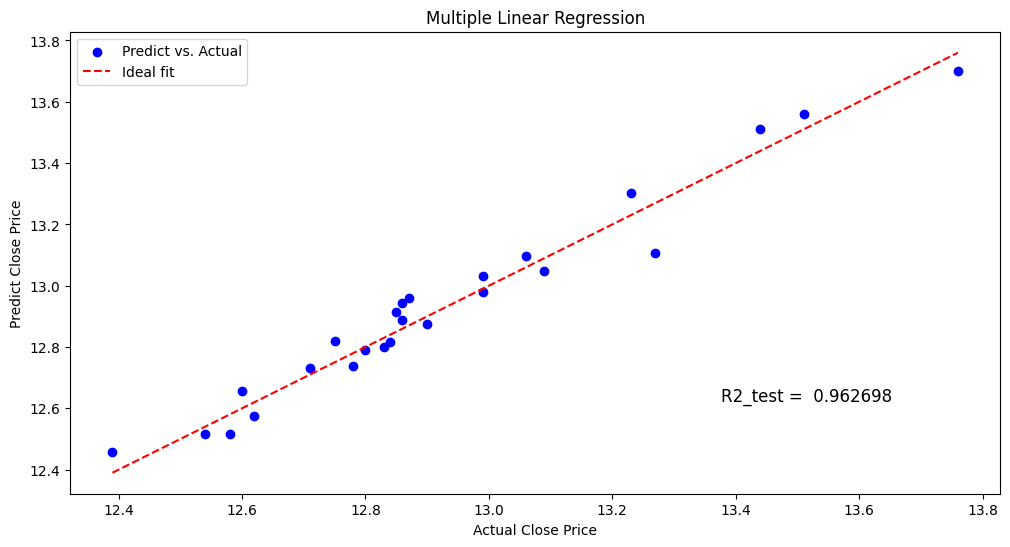

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ---------------- 读取数据 ----------------
file_name = "../../dataset/raw/sh600000_2017.csv"
df_result = pd.read_csv(file_name)

df_result['open'] = df_result['open'].astype(float)
df_result['high'] = df_result['high'].astype(float)
df_result['low'] = df_result['low'].astype(float)
df_result['volume'] = df_result['volume'].astype(float)
df_result['close'] = df_result['close'].astype(float)

X = df_result[['open','high','low','volume']]
y = df_result[['close']]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 创建多元线性回归模型
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# 训练集的预测
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# R2分数
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

# 画图
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predict vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.xlabel("Actual Close Price")
plt.ylabel("Predict Close Price")
plt.text(0.7, 0.2, f"R2_test = {R2_test: 3f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

岭回归
使用场景
* 特征数量多、特征间高度相关（多重共线性严重）
* 希望减少模型方差，提高泛化能力
* 不需要特征选择（保留所有特征信息）

与上面的多元线性回归代码不同之处只是导入了Ridge和设置alpha正则化系数

D:\anaconda3\envs\mcon\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.12819e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


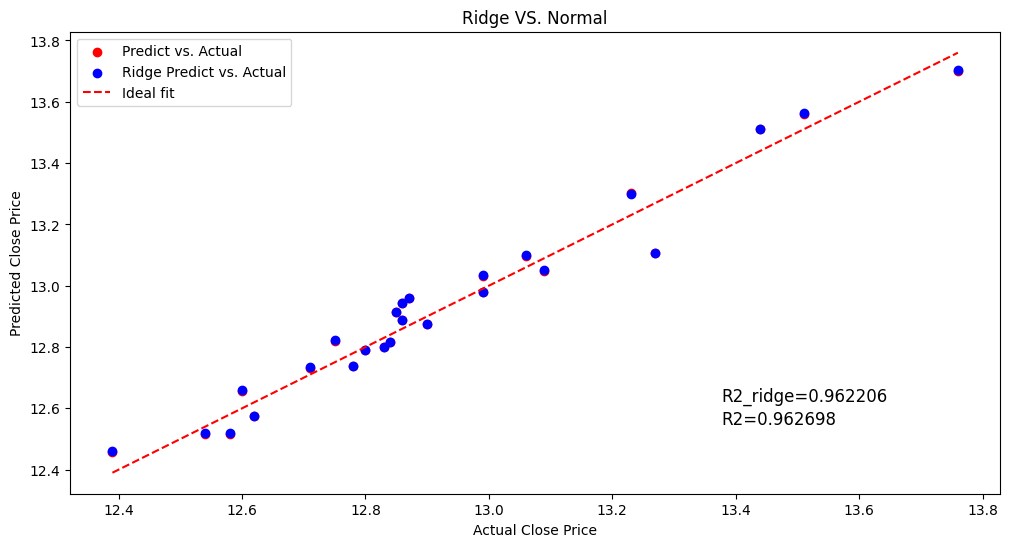

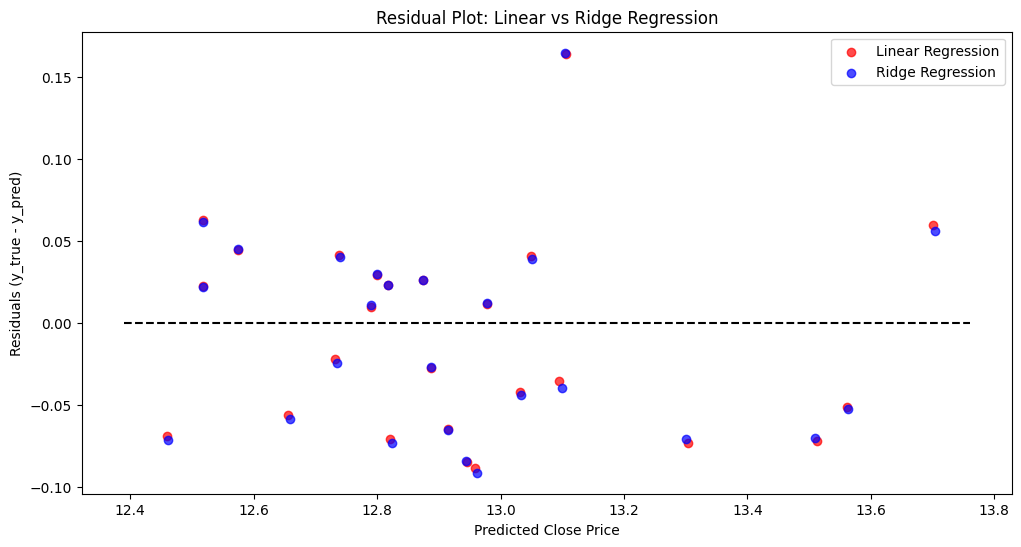

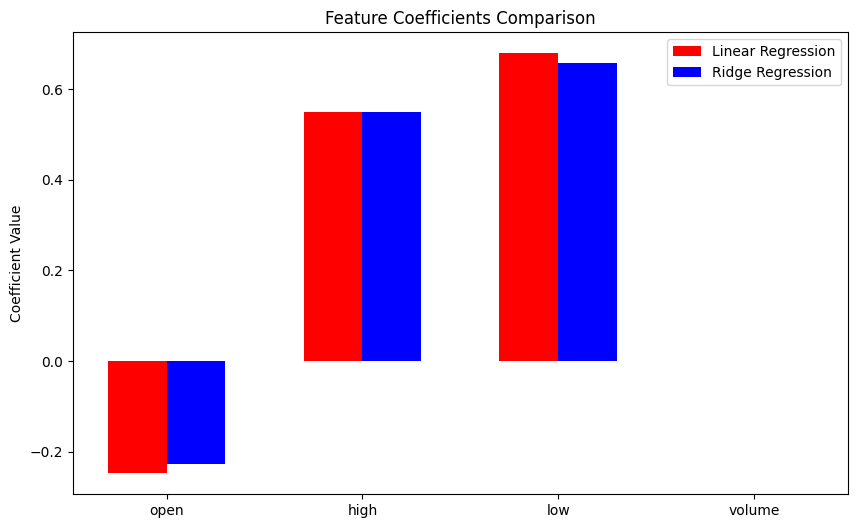

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

file_name = "../../dataset/raw/sh600000_2017.csv"
df_result = pd.read_csv(file_name)
df_result['open'] = df_result['open'].astype(float)
df_result['high'] = df_result['high'].astype(float)
df_result['low'] = df_result['low'].astype(float)
df_result['volume'] = df_result['volume'].astype(float)
df_result['close'] = df_result['close'].astype(float)

X = df_result[['open','high','low','volume']]
y = df_result[['close']]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 岭回归
alpha = 0.01
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# 普通多元线性回归
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 普通多元线性回归的R2
R2_test = r2_score(y_test, regressor.predict(X_test))
# 岭回归的R2
R2_ridge_test = r2_score(y_test, ridge_regressor.predict(X_test))

# 可视化
plt.figure(figsize=(12,6))

plt.scatter(y_test, regressor.predict(X_test), color='red', label='Predict vs. Actual')
plt.scatter(y_test, ridge_regressor.predict(X_test), color='blue', label='Ridge Predict vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.text(0.7,0.2,f"R2_ridge={R2_ridge_test:3f}",color='black', fontsize=12,transform=plt.gca().transAxes)
plt.text(0.7,0.15,f"R2={R2_test:3f}",color='black', fontsize=12,transform=plt.gca().transAxes)

plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Ridge VS. Normal")
plt.legend()
plt.show()

# 计算残差
residuals_lr = y_test.values.flatten() - regressor.predict(X_test).flatten()
residuals_ridge = y_test.values.flatten() - ridge_regressor.predict(X_test).flatten()

plt.figure(figsize=(12,6))
plt.scatter(regressor.predict(X_test), residuals_lr, color='red', alpha=0.7, label='Linear Regression')
plt.scatter(ridge_regressor.predict(X_test), residuals_ridge, color='blue', alpha=0.7, label='Ridge Regression')
plt.hlines(0, y.min(), y.max(), colors='black', linestyles='dashed')
plt.xlabel("Predicted Close Price")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot: Linear vs Ridge Regression")
plt.legend()
plt.show()

import numpy as np

features = X.columns
coef_lr = regressor.coef_.flatten()
coef_ridge = ridge_regressor.coef_.flatten()

x = np.arange(len(features))
plt.figure(figsize=(10,6))
plt.bar(x - 0.15, coef_lr, width=0.3, label='Linear Regression', color='red')
plt.bar(x + 0.15, coef_ridge, width=0.3, label='Ridge Regression', color='blue')
plt.xticks(x, features)
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients Comparison")
plt.legend()
plt.show()


Lasso回归



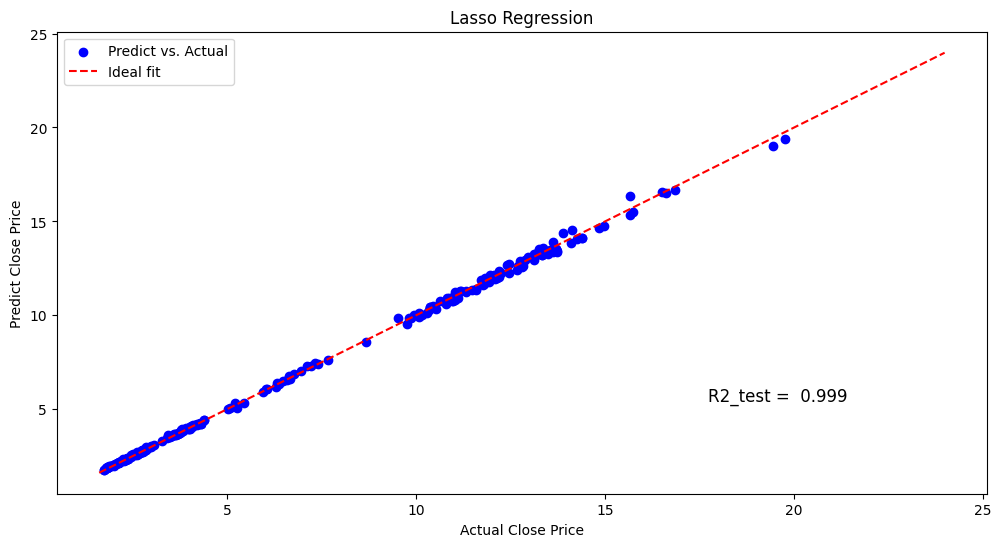

Lasso回归系数: [ 0.00000000e+00  8.31945821e-01  1.55844856e-01 -1.08380956e-09]
Lasso回归截距: [0.02820676]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# ---------------- 读取数据 ----------------
# file_name = "../../dataset/raw/sh600000_2017.csv"
file_name = "../../dataset/raw/yf2014_2018.csv"
df_result = pd.read_csv(file_name)

# 将相关列转换为 float 类型
# 遍历指定列，将每一列的数据类型转换为 float
# 确保数据是数值型，方便后续回归计算
for col in ['Open', 'High', 'Low', 'Volume', 'Close']:
    df_result[col] = df_result[col].astype(float)

# 特征与目标
# 用双中括号 [['Close']] 保持为 DataFrame 格式，而不是 Series
X = df_result[['Open','High','Low','Volume']]   # X 是特征矩阵（输入），包含开盘价、最高价、最低价、成交量四个特征
y = df_result[['Close']]    # y 是目标变量（输出），即收盘价

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 创建 Lasso 回归模型（alpha 可调，默认 1.0）
# alpha=0.1：正则化强度，越大惩罚越强，部分系数可能被压成 0（特征稀疏化）
# max_iter=5000：最大迭代次数，防止算法不收敛
lasso_regressor = Lasso(alpha=0.1, max_iter=5000)  # alpha 越大，惩罚越强，系数越趋向于 0
lasso_regressor.fit(X_train, y_train)   # 用训练集训练 Lasso 模型，求出最佳系数和截距

# 训练集与测试集预测收盘价
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

# R2 分数
R2_train = r2_score(y_train, y_train_pred)# 训练集真实结果 vs 训练集预测结果
R2_test = r2_score(y_test, y_test_pred)# 测试集真实结果 vs 测试集预测结果

# 画图
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predict vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.xlabel("Actual Close Price")
plt.ylabel("Predict Close Price")
plt.text(0.7, 0.2, f"R2_test = {R2_test: .3f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.title('Lasso Regression')
plt.legend()
plt.show()

# 输出系数
print("Lasso回归系数:", lasso_regressor.coef_)
print("Lasso回归截距:", lasso_regressor.intercept_)
